In [1]:
import os
os.environ["KERAS_BACKEND"] = "torch"

In [2]:
import keras
import torch
import tensorflow as tf
import numpy as np
from keras import layers

print(f"Moteur utilisé : {keras.backend.backend()}")
# print(f"GPU disponible pour PyTorch : {torch.cuda.is_available()}")

Moteur utilisé : torch


### 1. Mise en forme des données

In [3]:
# -
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
#-
"""
Pour le traitement des données mnist fashion, le CNN doit être constitué de la sorte :
- 2 couches de convolutions : 16 filtes de 5x5 relu et avgpooling de 2x2, et 32 filtres de 3x3 relu et avgpooling de 2x2
Le dataset étant simple, c'est pour ça qu'on n'utilise pas plus de filtres, et que les filtres sont relativement petits (5x5 et 3x3)
"""

#-
"""
Si on prévoit d'utiliser sparse categorical crossentropy, il faut que les labels soient des entiers (0-9) et pas des one-hot encodings.
"""
print("Exemple de label : ", y_train[0])
"""
Donc il n'y a rien à faire, les labels sont déjà dans le bon format.
"""

#-
dictLabels = {
    0: "T-shirt",
    1: "Pantalon",
    2: "Pull",
    3: "Robe",
    4: "Manteau",
    5: "Sandales",
    6: "Chemise",
    7: "Basket",
    8: "Sac",
    9: "Bottine",
}


Exemple de label :  9


In [5]:
import matplotlib.pyplot as plt

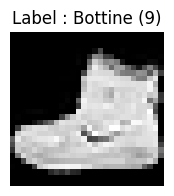

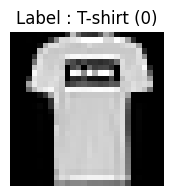

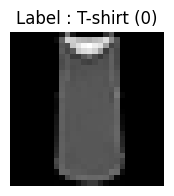

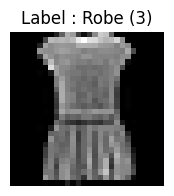

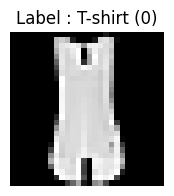

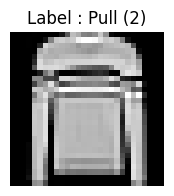

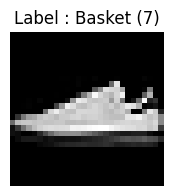

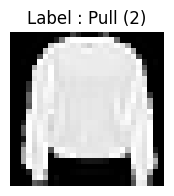

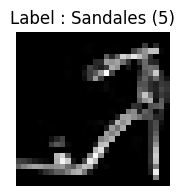

In [6]:
#-
for i in range(9):
    plt.figure(figsize=(2, 2))
    plt.title(f"Label : {dictLabels[y_train[i]]} ({y_train[i]})")
    plt.imshow(x_train[i], cmap="gray")
    plt.axis("off")
    plt.show()

In [7]:
#-
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### 2. Création d'un premier modèle CNN

In [8]:
#-
"""
Il y aura dix neurones en couche de sortie, un pour chaque classe.
Fonction d'activation softmax pour que les sorties soient des probabilités.
Fonction de perte : sparse categorical crossentropy, car les labels sont des entiers et pas des one-hot encodings.
"""

#-
model = keras.Sequential(
    [
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(16, (5, 5), activation="relu"),
        layers.AveragePooling2D((2, 2)), # divise la taille de l'image par 2
        layers.Conv2D(32, (3, 3), activation="relu"),
        layers.AveragePooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 12, 12, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 32)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,298 (954.29 KB)

 Trainable params: 244,298 (954.29 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#-
"""
Nombre de paramètres couches de convolution :
- Couche 1 cnn : (5*5*1) * 16 + 16 = 416
- Couche 2 cnn : (3*3*16) * 32 + 32 = 4640

Nombre de paramètres couches denses :
- Couche 1 dense : (5*5*32) * 256 + 256 = 205,056 
- Couche 2 dense : 256 * 128 + 128 = 32,896
- Couche 3 dense : 128 * 10 + 10 = 1,290
Total : 416 + 4640 + 205,056 + 32,896 + 1,290 = 244,298 paramètres
"""

'\nNombre de paramètres couches de convolution :\n- Couche 1 cnn : (5*5*1) * 16 + 16 = 416\n- Couche 2 cnn : (3*3*16) * 32 + 32 = 4640\n\nNombre de paramètres couches denses :\n- Couche 1 dense : (5*5*32) * 256 + 256 = 205,056 \n- Couche 2 dense : 256 * 128 + 128 = 32,896\n- Couche 3 dense : 128 * 10 + 10 = 1,290\nTotal : 416 + 4640 + 205,056 + 32,896 + 1,290 = 244,298 paramètres\n'

In [10]:
#-
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=30, batch_size=512, validation_split=0.2)

Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6824 - loss: 0.9009 - val_accuracy: 0.7525 - val_loss: 0.6274
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7918 - loss: 0.5561 - val_accuracy: 0.8074 - val_loss: 0.5215
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8264 - loss: 0.4786 - val_accuracy: 0.8353 - val_loss: 0.4538
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8422 - loss: 0.4390 - val_accuracy: 0.8443 - val_loss: 0.4321
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8529 - loss: 0.4084 - val_accuracy: 0.8552 - val_loss: 0.4037
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8606 - loss: 0.3834 - val_accuracy: 0.8654 - val_loss: 0.3839
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8687 - loss: 0.3625 - val_accuracy: 0.8683 - val_loss: 0.3738
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8750 - loss: 0.3466 - val_accuracy: 0.8731 - v

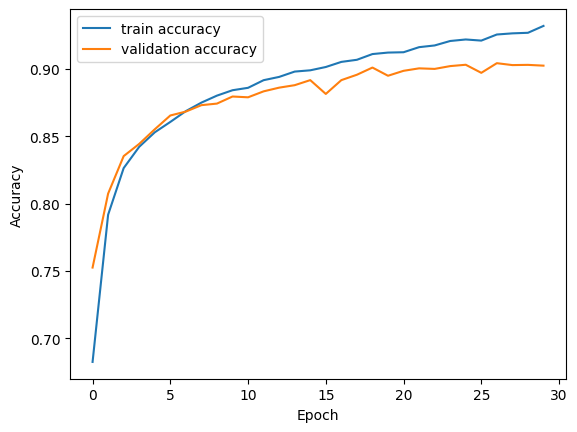

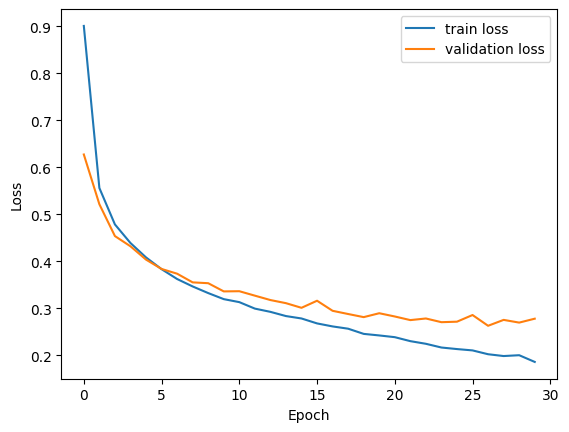

In [11]:
plt.plot(history.history["accuracy"], label="train accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [12]:
#- pooling
model1212 = None

model1212 = keras.Sequential(
    [
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(16, (5, 5), activation="relu"),
        layers.AveragePooling2D((2, 2)), # divise la taille de l'image par 2
        layers.Dropout(0.25),
        layers.Conv2D(32, (3, 3), activation="relu"),
        layers.AveragePooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.25),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.25),
        layers.Dense(10, activation="softmax"),
    ]
)
model1212.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model1212.fit(x_train, y_train, epochs=30, batch_size=512, validation_split=0.2)


Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6169 - loss: 1.0222 - val_accuracy: 0.7738 - val_loss: 0.5726
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7642 - loss: 0.6112 - val_accuracy: 0.8058 - val_loss: 0.4950
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7966 - loss: 0.5368 - val_accuracy: 0.8307 - val_loss: 0.4538
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8136 - loss: 0.4953 - val_accuracy: 0.8421 - val_loss: 0.4262
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8276 - loss: 0.4644 - val_accuracy: 0.8540 - val_loss: 0.3998
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8376 - loss: 0.4380 - val_accuracy: 0.8605 - val_loss: 0.3755
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.8444 - loss: 0.4202 - val_accuracy: 0.8655 - val_loss: 0.3588
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8530 - loss: 0.3987 - val_accuracy: 0.8704 - v

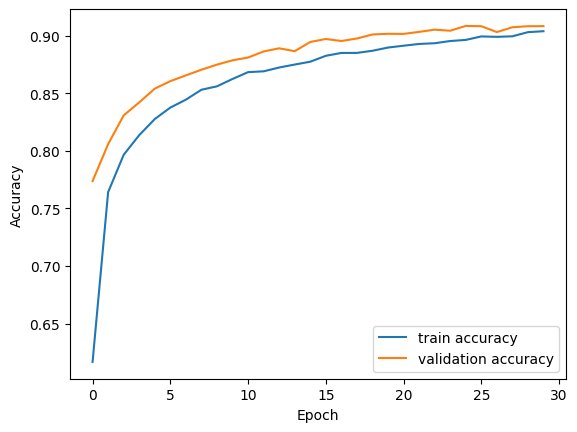

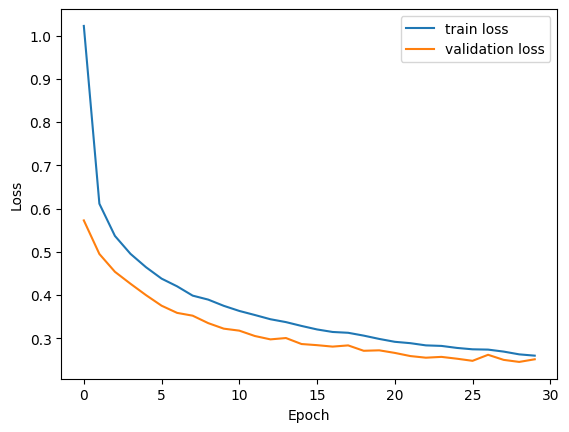

In [13]:
#-
plt.plot(history.history["accuracy"], label="train accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

On n'a plus d'overfitting depuis les dropout, bien que l'accuracy soit moins bonne que sans dropout au bout de 30 epochs.

augmenter le nombre d'epoch n'est pas nécessaire puisqu'on voit que la courbe de train accuracy va dépasser la courbe de validation, qui est en train de stagner, signe d'overfitting.


In [14]:
#- ajout dense 128
keras.backend.clear_session()

modeldense = keras.Sequential(
    [
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(16, (5, 5), activation="relu"),
        layers.AveragePooling2D((2, 2)), # divise la taille de l'image par 2
        layers.Dropout(0.25),
        layers.Conv2D(32, (3, 3), activation="relu"),
        layers.AveragePooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.25),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.25),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.25),
        layers.Dense(10, activation="softmax"),
    ]
)
modeldense.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = modeldense.fit(x_train, y_train, epochs=30, batch_size=512, validation_split=0.2)


Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5680 - loss: 1.1506 - val_accuracy: 0.7588 - val_loss: 0.6337
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7472 - loss: 0.6616 - val_accuracy: 0.7919 - val_loss: 0.5213
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7785 - loss: 0.5799 - val_accuracy: 0.8189 - val_loss: 0.4698
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8008 - loss: 0.5332 - val_accuracy: 0.8370 - val_loss: 0.4400
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8173 - loss: 0.4975 - val_accuracy: 0.8457 - val_loss: 0.4110
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8296 - loss: 0.4625 - val_accuracy: 0.8542 - val_loss: 0.3945
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8383 - loss: 0.4400 - val_accuracy: 0.8620 - val_loss: 0.3733
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8460 - loss: 0.4190 - val_accuracy: 0.8659 - v

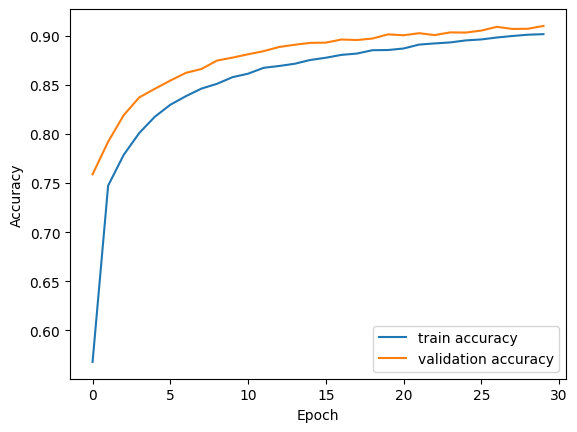

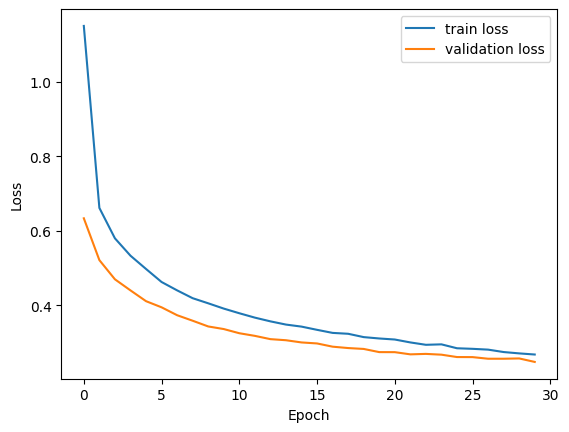

In [15]:
plt.plot(history.history["accuracy"], label="train accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

rien n'a changé en ajoutant un dense de 128 neurones, du fait de la simplicité du dataset, qui ne nécessite pas un modèle plus complexe pour être appris.

### 3. Traitement des données cifar10

In [ ]:
#-
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = keras.datasets.cifar10.load_data()

#-
print(f"Type des données: {type(x_train_cifar)}")
print(f"Type des valeurs: {x_train_cifar.dtype}")
print(f"Forme x_train: {x_train_cifar.shape}")
print(f"Forme y_train: {y_train_cifar.shape}")
print(f"Forme x_test: {x_test_cifar.shape}")
print(f"Forme y_test: {y_test_cifar.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


c:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\datasets\cifar.py:18: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  d = cPickle.load(f, encoding="bytes")


Type des données: <class 'numpy.ndarray'>
Type des valeurs: uint8
Forme x_train: (50000, 32, 32, 3)
Forme y_train: (50000, 1)
Forme x_test: (10000, 32, 32, 3)
Forme y_test: (10000, 1)


In [ ]:
#-
dictLabels_cifar = {
    0: "Avion",
    1: "Voiture",
    2: "Oiseau",
    3: "Chat",
    4: "Biche",
    5: "Chien",
    6: "Grenouille",
    7: "Cheval",
    8: "Bateau",
    9: "Camion"
}

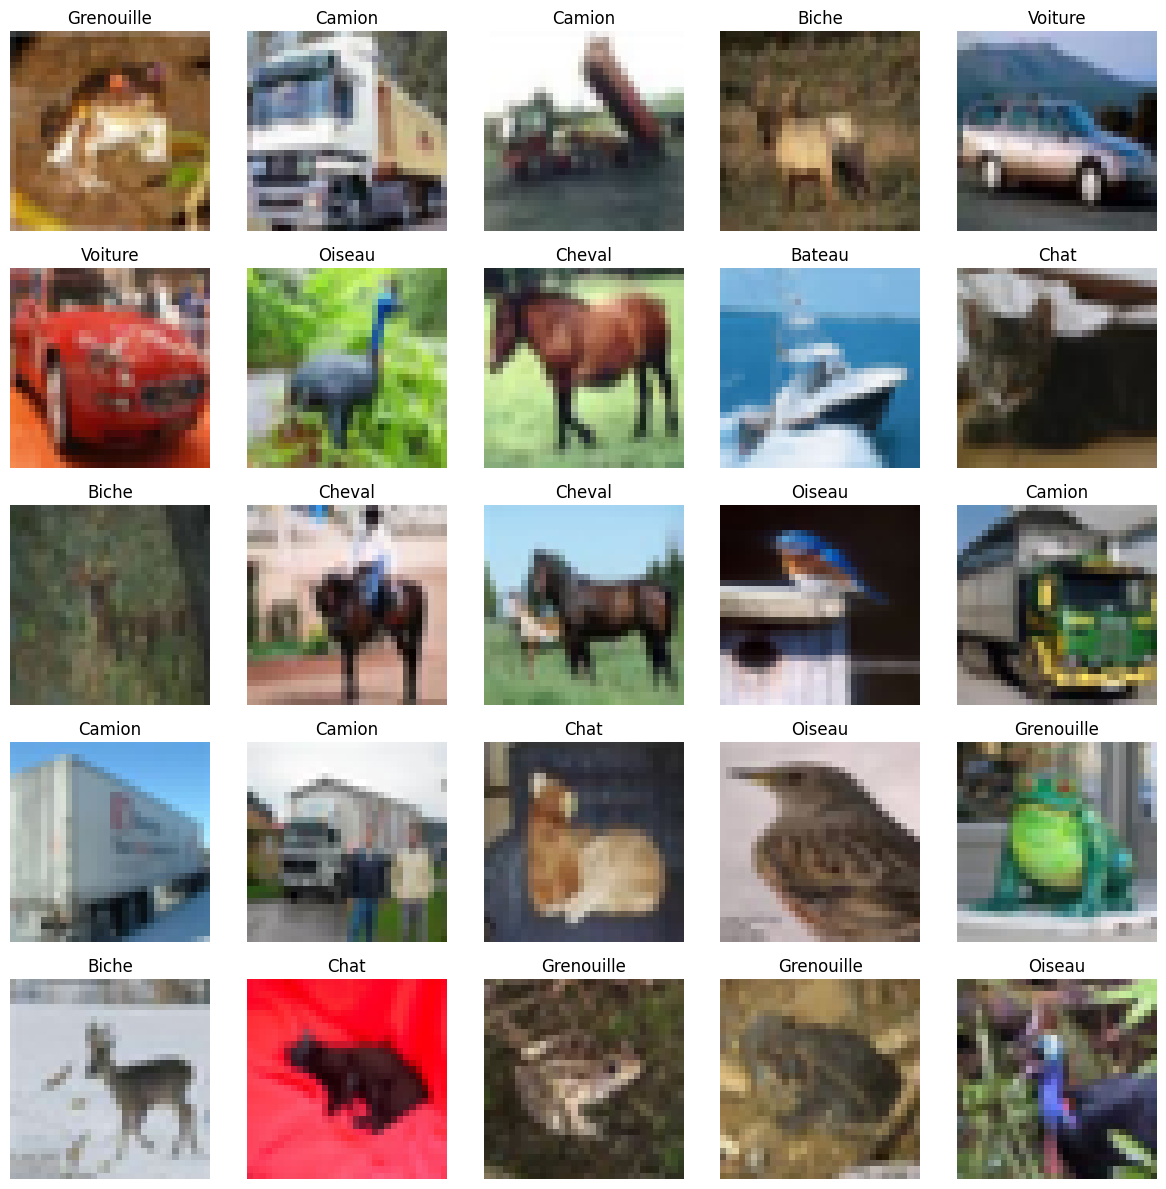

In [ ]:
#-
plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train_cifar[i])
    plt.title(f"{dictLabels_cifar[y_train_cifar[i][0]]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
#-
keras.backend.clear_session()

model_cifar1 = keras.Sequential(
    [
        layers.Input(shape=(32, 32, 3)),
        layers.Conv2D(16, (5, 5), activation="relu"),
        layers.AveragePooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation="relu"),
        layers.AveragePooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)
model_cifar1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 6, 6, 32)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 335,210 (1.28 MB)

 Trainable params: 335,210 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#-
"""
Nombre de paramètres :
- Conv2D 1 : (5*5*3) * 16 + 16 = 1,216
- Conv2D 2 : (3*3*16) * 32 + 32 = 4,640
- Dense 1 : (6*6*32) * 256 + 256 = 295,168
- Dense 2 : 256 * 128 + 128 = 32,896
- Dense 3 : 128 * 10 + 10 = 1,290
Total : 335,210 paramètres
"""

'\nNombre de paramètres :\n- Conv2D 1 : (5*5*3) * 16 + 16 = 1,216\n- Conv2D 2 : (3*3*16) * 32 + 32 = 4,640\n- Dense 1 : (6*6*32) * 256 + 256 = 295,168\n- Dense 2 : 256 * 128 + 128 = 32,896\n- Dense 3 : 128 * 10 + 10 = 1,290\nTotal : 335,210 paramètres\n'

In [ ]:
#-
model_cifar1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history_cifar1 = model_cifar1.fit(x_train_cifar, y_train_cifar, epochs=30, batch_size=512, validation_split=0.2)

test_loss, test_acc = model_cifar1.evaluate(x_test_cifar, y_test_cifar)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.0991 - loss: 14.5117 - val_accuracy: 0.1025 - val_loss: 14.4660
Epoch 2/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.0994 - loss: 14.5164 - val_accuracy: 0.1025 - val_loss: 14.4660
Epoch 3/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.0994 - loss: 14.5164 - val_accuracy: 0.1025 - val_loss: 14.4660
Epoch 4/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.0994 - loss: 14.5164 - val_accuracy: 0.1025 - val_loss: 14.4660
Epoch 5/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.0994 - loss: 14.5164 - val_accuracy: 0.1025 - val_loss: 14.4660
Epoch 6/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.0994 - loss: 14.5164 - val_accuracy: 0.1025 - val_loss: 14.4660
Epoch 7/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.0994 - loss: 14.5164 - val_accuracy: 0.1025 - val_loss: 14.4660
Epoch 8/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.0994 - loss: 14.5164 - val_accur

Très bas (10% d'accuracy) car le modèle n'a pas été normalisé > explosion du gradient est la cause la plus probable de ce résultat.

In [ ]:
#-
x_train_cifar_norm = x_train_cifar / 255.0
x_test_cifar_norm = x_test_cifar / 255.0

In [ ]:
keras.backend.clear_session()

model_cifar2 = keras.Sequential(
    [
        layers.Input(shape=(32, 32, 3)),
        layers.Conv2D(16, (5, 5), activation="relu"),
        layers.AveragePooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation="relu"),
        layers.AveragePooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

model_cifar2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history_cifar2 = model_cifar2.fit(x_train_cifar_norm, y_train_cifar, epochs=30, batch_size=512, validation_split=0.2)

test_loss, test_acc = model_cifar2.evaluate(x_test_cifar_norm, y_test_cifar)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.3177 - loss: 1.8915 - val_accuracy: 0.3909 - val_loss: 1.7049
Epoch 2/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.4338 - loss: 1.5727 - val_accuracy: 0.4436 - val_loss: 1.5557
Epoch 3/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.4816 - loss: 1.4447 - val_accuracy: 0.4864 - val_loss: 1.4440
Epoch 4/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.5161 - loss: 1.3535 - val_accuracy: 0.4977 - val_loss: 1.4150
Epoch 5/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.5404 - loss: 1.2906 - val_accuracy: 0.5249 - val_loss: 1.3463
Epoch 6/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.5670 - loss: 1.2176 - val_accuracy: 0.5552 - val_loss: 1.2663
Epoch 7/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.5909 - loss: 1.1540 - val_accuracy: 0.5779 - val_loss: 1.1833
Epoch 8/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.6090 - loss: 1.1035 - val_accuracy: 0.5772 - v

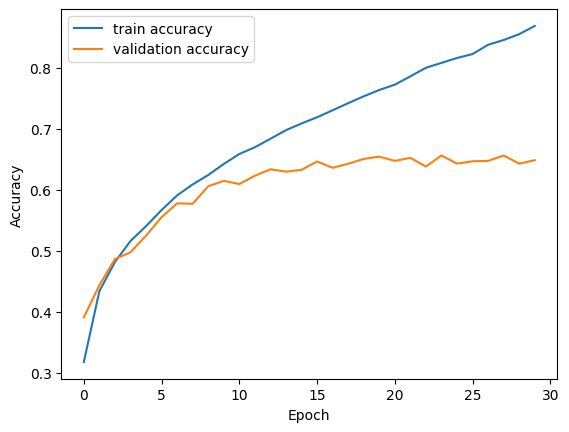

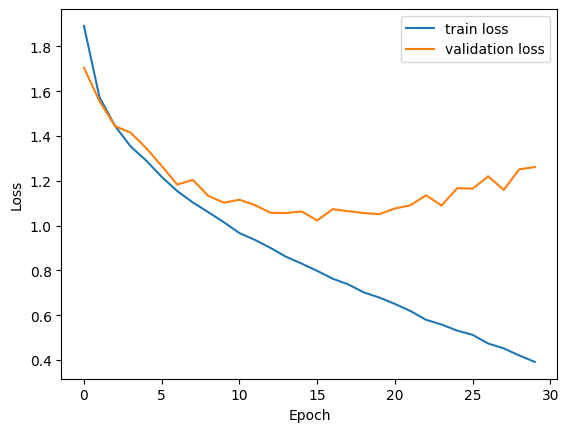

In [26]:
plt.plot(history_cifar2.history["accuracy"], label="train accuracy")
plt.plot(history_cifar2.history["val_accuracy"], label="validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history_cifar2.history["loss"], label="train loss")
plt.plot(history_cifar2.history["val_loss"], label="validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

On voit directement de l'overfitting : le modèle peut être amélioré.

In [ ]:
#-
keras.backend.clear_session()

model_cifar3 = keras.Sequential(
    [
        layers.Input(shape=(32, 32, 3)),
        layers.Conv2D(16, (5, 5), activation="relu"),
        layers.AveragePooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation="relu"),
        layers.AveragePooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model_cifar3.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history_cifar3 = model_cifar3.fit(x_train_cifar_norm, y_train_cifar, epochs=30, batch_size=512, validation_split=0.2)

test_loss, test_acc = model_cifar3.evaluate(x_test_cifar_norm, y_test_cifar)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.2401 - loss: 2.0455 - val_accuracy: 0.3420 - val_loss: 1.7975
Epoch 2/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.3689 - loss: 1.7256 - val_accuracy: 0.4242 - val_loss: 1.5826
Epoch 3/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.4173 - loss: 1.5837 - val_accuracy: 0.4450 - val_loss: 1.5550
Epoch 4/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4553 - loss: 1.5053 - val_accuracy: 0.5048 - val_loss: 1.3890
Epoch 5/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4780 - loss: 1.4410 - val_accuracy: 0.5281 - val_loss: 1.3370
Epoch 6/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.5012 - loss: 1.3877 - val_accuracy: 0.4866 - val_loss: 1.4296
Epoch 7/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.5100 - loss: 1.3717 - val_accuracy: 0.5412 - val_loss: 1.2959
Epoch 8/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.5264 - loss: 1.3255 - val_accuracy: 0.5405 - v

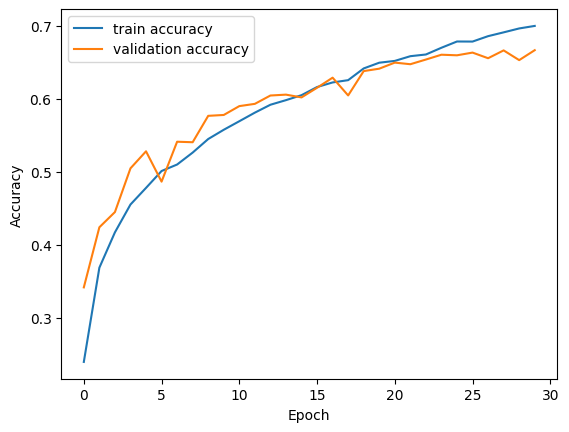

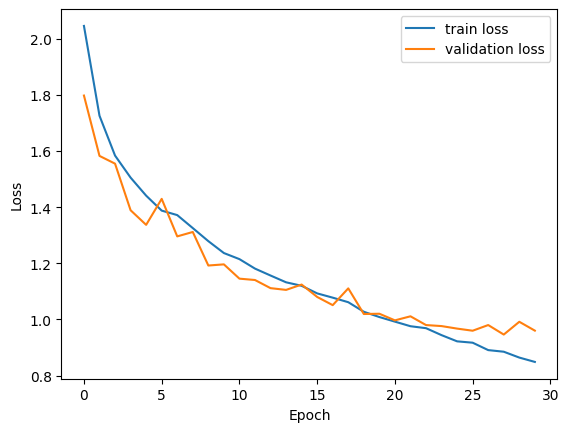

In [ ]:
#-
plt.plot(history_cifar3.history["accuracy"], label="train accuracy")
plt.plot(history_cifar3.history["val_accuracy"], label="validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history_cifar3.history["loss"], label="train loss")
plt.plot(history_cifar3.history["val_loss"], label="validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

L'accuracy a augmenté de 2% grâce au dropout. L'overfitting se fait ressentir au bout de 20 epochs.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


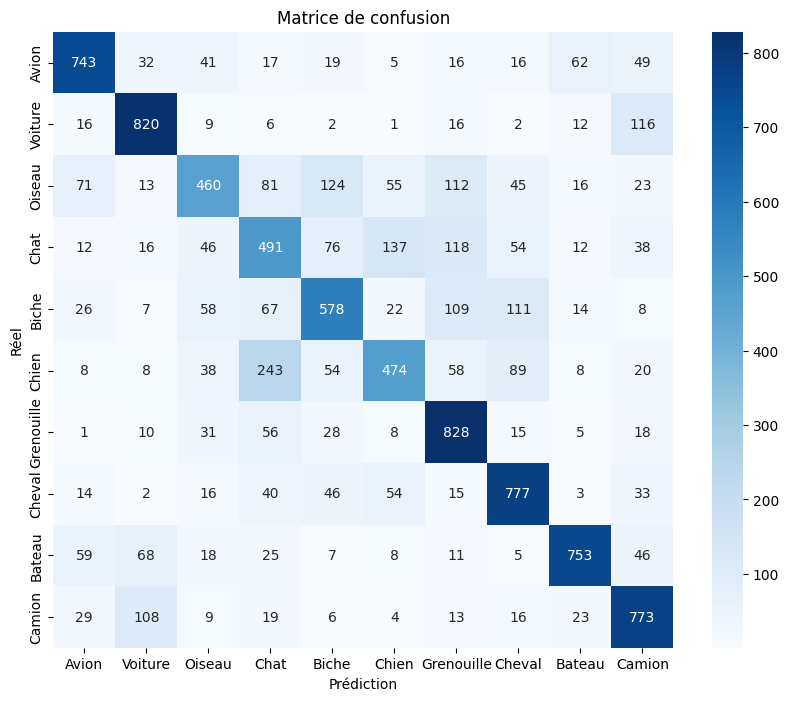

In [ ]:
#-
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model_cifar3.predict(x_test_cifar_norm)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test_cifar, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=list(dictLabels_cifar.values()), 
            yticklabels=list(dictLabels_cifar.values()))
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.title("Matrice de confusion")
plt.show()

L'oiseau est la classe la moins bien reconnue.

### 4. Amélioration du modèle

In [ ]:
#-
"""
Augmenter le nombre de couches conv + pooling n'est 
pas le plus judicieux, car on apperçoit déjà de l'overfitting rapidement.
"""

In [ ]:
#-
keras.backend.clear_session()

model_cifar4 = keras.Sequential(
    [
        layers.Input(shape=(32, 32, 3)),
        layers.Conv2D(16, (3, 3), activation="relu"),
        layers.Conv2D(16, (3, 3), activation="relu"),
        layers.AveragePooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation="relu"),
        layers.AveragePooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model_cifar4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 6, 6, 32)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 336,762 (1.28 MB)

 Trainable params: 336,762 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#-
"""
Nombre de paramètres :
- Conv2D 1 : (3*3*3) * 16 + 16 = 448
- Conv2D 2 : (3*3*16) * 16 + 16 = 2,320
- Conv2D 3 : (3*3*16) * 32 + 32 = 4,640
- Dense 1 : (5*5*32) * 256 + 256 = 205,056
- Dense 2 : 256 * 128 + 128 = 32,896
- Dense 3 : 128 * 10 + 10 = 1,290
Total : 246,650 paramètres
"""

'\nNombre de paramètres :\n- Conv2D 1 : (3*3*3) * 16 + 16 = 448\n- Conv2D 2 : (3*3*16) * 16 + 16 = 2,320\n- Conv2D 3 : (3*3*16) * 32 + 32 = 4,640\n- Dense 1 : (5*5*32) * 256 + 256 = 205,056\n- Dense 2 : 256 * 128 + 128 = 32,896\n- Dense 3 : 128 * 10 + 10 = 1,290\nTotal : 246,650 paramètres\n'

In [ ]:
#-
model_cifar4.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history_cifar4 = model_cifar4.fit(x_train_cifar_norm, y_train_cifar, epochs=30, batch_size=512, validation_split=0.2)

test_loss, test_acc = model_cifar4.evaluate(x_test_cifar_norm, y_test_cifar)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.2200 - loss: 2.0796 - val_accuracy: 0.3558 - val_loss: 1.8076
Epoch 2/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.3614 - loss: 1.7515 - val_accuracy: 0.4360 - val_loss: 1.5691
Epoch 3/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.4144 - loss: 1.6046 - val_accuracy: 0.4875 - val_loss: 1.4417
Epoch 4/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.4536 - loss: 1.5011 - val_accuracy: 0.4770 - val_loss: 1.4620
Epoch 5/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.4797 - loss: 1.4447 - val_accuracy: 0.5268 - val_loss: 1.3323
Epoch 6/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.5007 - loss: 1.3867 - val_accuracy: 0.5258 - val_loss: 1.3379
Epoch 7/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.5188 - loss: 1.3407 - val_accuracy: 0.5541 - val_loss: 1.2528
Epoch 8/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.5386 - loss: 1.2952 - val_accuracy: 0.5524 - v

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


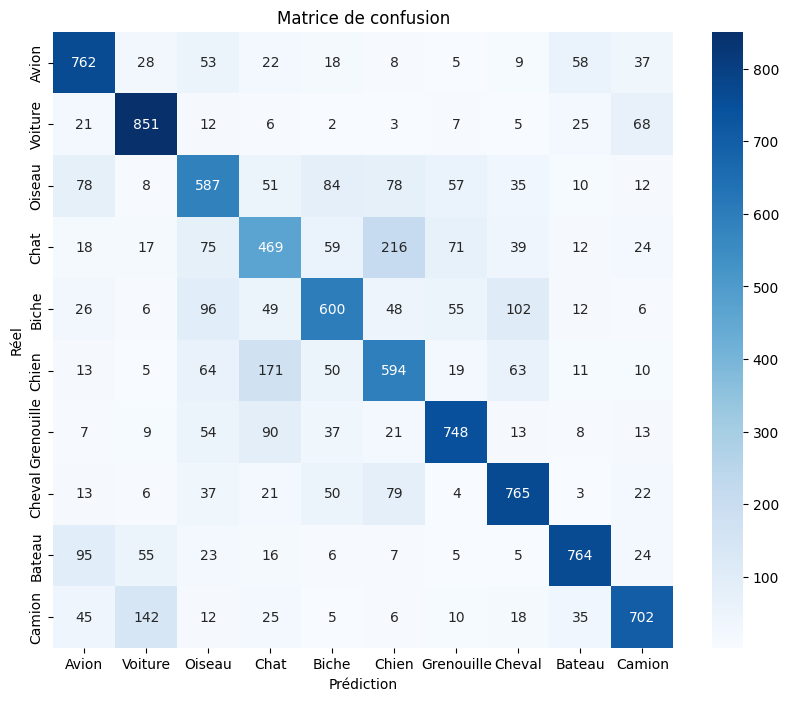

In [33]:
y_pred4 = model_cifar4.predict(x_test_cifar_norm)
y_pred4_classes = np.argmax(y_pred4, axis=1)

cm4 = confusion_matrix(y_test_cifar, y_pred4_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm4, annot=True, fmt="d", cmap="Blues", 
            xticklabels=list(dictLabels_cifar.values()), 
            yticklabels=list(dictLabels_cifar.values()))
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.title("Matrice de confusion")
plt.show()

In [34]:
keras.backend.clear_session()

model_cifar5 = keras.Sequential(
    [
        layers.Input(shape=(32, 32, 3)),
        layers.Conv2D(16, (3, 3), activation="relu", padding="same"),
        layers.Conv2D(16, (3, 3), activation="relu", padding="same"),
        layers.AveragePooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
        layers.AveragePooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model_cifar5.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history_cifar5 = model_cifar5.fit(x_train_cifar_norm, y_train_cifar, epochs=30, batch_size=512, validation_split=0.2)

test_loss, test_acc = model_cifar5.evaluate(x_test_cifar_norm, y_test_cifar)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.2142 - loss: 2.0978 - val_accuracy: 0.3211 - val_loss: 1.8400
Epoch 2/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.3490 - loss: 1.7634 - val_accuracy: 0.4440 - val_loss: 1.5252
Epoch 3/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.4115 - loss: 1.6030 - val_accuracy: 0.4830 - val_loss: 1.4374
Epoch 4/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.4474 - loss: 1.5148 - val_accuracy: 0.5010 - val_loss: 1.3770
Epoch 5/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.4740 - loss: 1.4558 - val_accuracy: 0.5241 - val_loss: 1.3171
Epoch 6/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.4907 - loss: 1.4110 - val_accuracy: 0.5445 - val_loss: 1.2717
Epoch 7/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.5109 - loss: 1.3644 - val_accuracy: 0.5631 - val_loss: 1.2217
Epoch 8/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.5224 - loss: 1.3282 - val_accuracy: 0.5725 - v

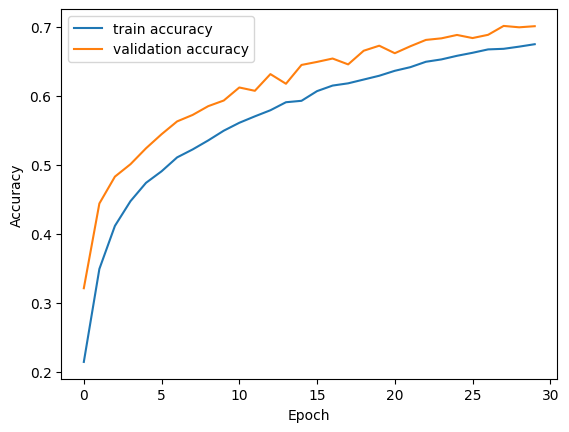

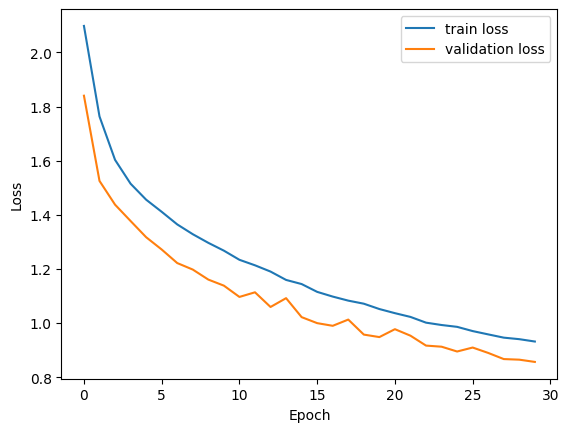

In [35]:
plt.plot(history_cifar5.history["accuracy"], label="train accuracy")
plt.plot(history_cifar5.history["val_accuracy"], label="validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history_cifar5.history["loss"], label="train loss")
plt.plot(history_cifar5.history["val_loss"], label="validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [36]:
y_pred5 = model_cifar5.predict(x_test_cifar_norm)
y_pred5_classes = np.argmax(y_pred5, axis=1)

cm5 = confusion_matrix(y_test_cifar, y_pred5_classes)

errors = {}
for i in range(10):
    for j in range(10):
        if i != j and cm5[i, j] > 0:
            errors[(i, j)] = cm5[i, j]

top_errors = sorted(errors.items(), key=lambda x: x[1], reverse=True)[:3]
print("Trois catégories d'erreurs les plus fréquentes:")
for (true_label, pred_label), count in top_errors:
    print(f"{dictLabels_cifar[true_label]} confondu avec {dictLabels_cifar[pred_label]}: {count} fois")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Trois catégories d'erreurs les plus fréquentes:
Chien confondu avec Chat: 195 fois
Chat confondu avec Chien: 154 fois
Oiseau confondu avec Biche: 149 fois


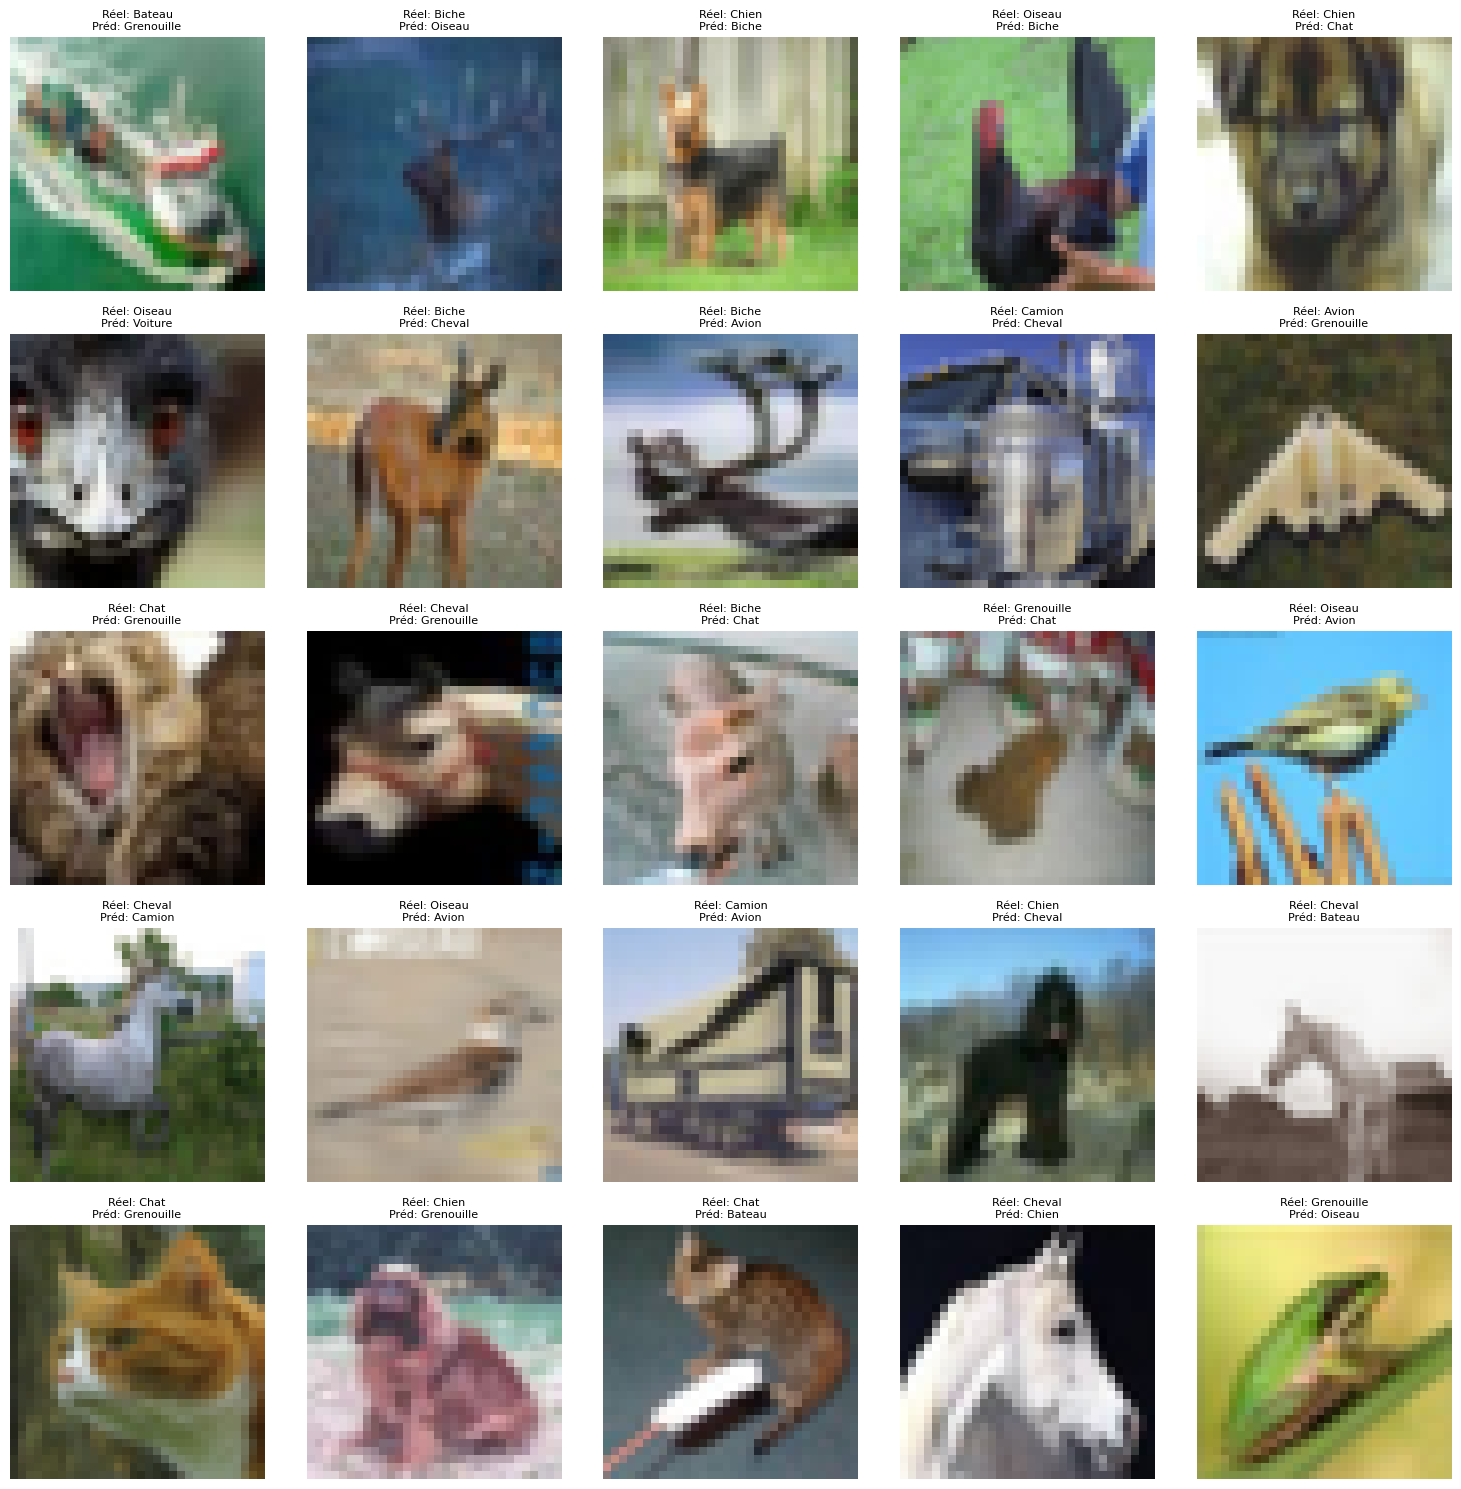

In [37]:
errors_indices = []
for i in range(len(y_test_cifar)):
    if y_test_cifar[i][0] != y_pred5_classes[i]:
        errors_indices.append(i)

plt.figure(figsize=(15, 15))
for i in range(25):
    idx = errors_indices[i]
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test_cifar_norm[idx])
    plt.title(f"Réel: {dictLabels_cifar[y_test_cifar[idx][0]]}\nPréd: {dictLabels_cifar[y_pred5_classes[idx]]}", fontsize=8)
    plt.axis("off")
plt.tight_layout()
plt.show()

### 5. Etude de quelques modifications

In [38]:
keras.backend.clear_session()

model_cifar6 = keras.Sequential(
    [
        layers.Input(shape=(32, 32, 3)),
        layers.Conv2D(16, (3, 3), activation="relu", padding="same"),
        layers.Conv2D(16, (3, 3), activation="relu", padding="same"),
        layers.AveragePooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
        layers.AveragePooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
        layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
        layers.AveragePooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model_cifar6.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history_cifar6 = model_cifar6.fit(x_train_cifar_norm, y_train_cifar, epochs=30, batch_size=512, validation_split=0.2)

Epoch 1/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.2006 - loss: 2.1184 - val_accuracy: 0.3145 - val_loss: 1.8641
Epoch 2/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.3260 - loss: 1.8243 - val_accuracy: 0.3803 - val_loss: 1.6887
Epoch 3/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.3816 - loss: 1.6755 - val_accuracy: 0.4344 - val_loss: 1.5388
Epoch 4/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.4218 - loss: 1.5776 - val_accuracy: 0.4675 - val_loss: 1.4475
Epoch 5/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.4498 - loss: 1.5105 - val_accuracy: 0.4929 - val_loss: 1.3842
Epoch 6/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.4696 - loss: 1.4599 - val_accuracy: 0.5138 - val_loss: 1.3310
Epoch 7/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.4876 - loss: 1.4180 - val_accuracy: 0.5263 - val_loss: 1.3018
Epoch 8/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.5117 - loss: 1.3593 - val_accuracy: 0.5543 - v

In [39]:
keras.backend.clear_session()

model_cifar7 = keras.Sequential(
    [
        layers.Input(shape=(32, 32, 3)),
        layers.Conv2D(16, (3, 3), activation="relu", padding="same"),
        layers.Conv2D(16, (3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
        layers.AveragePooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
        layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(128, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model_cifar7.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history_cifar7 = model_cifar7.fit(x_train_cifar_norm, y_train_cifar, epochs=30, batch_size=512, validation_split=0.2)

test_loss, test_acc = model_cifar7.evaluate(x_test_cifar_norm, y_test_cifar)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.2582 - loss: 2.2810 - val_accuracy: 0.1015 - val_loss: 2.3242
Epoch 2/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.3632 - loss: 1.7802 - val_accuracy: 0.0985 - val_loss: 2.3207
Epoch 3/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.4223 - loss: 1.6132 - val_accuracy: 0.0986 - val_loss: 2.5424
Epoch 4/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.4640 - loss: 1.5057 - val_accuracy: 0.0982 - val_loss: 3.7341
Epoch 5/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.4888 - loss: 1.4267 - val_accuracy: 0.0987 - val_loss: 4.7250
Epoch 6/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.5197 - loss: 1.3526 - val_accuracy: 0.1393 - val_loss: 3.3678
Epoch 7/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.5468 - loss: 1.2796 - val_accuracy: 0.2555 - val_loss: 2.5159
Epoch 8/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.5759 - loss: 1.2050 - val_accuracy: 0.3932 - v

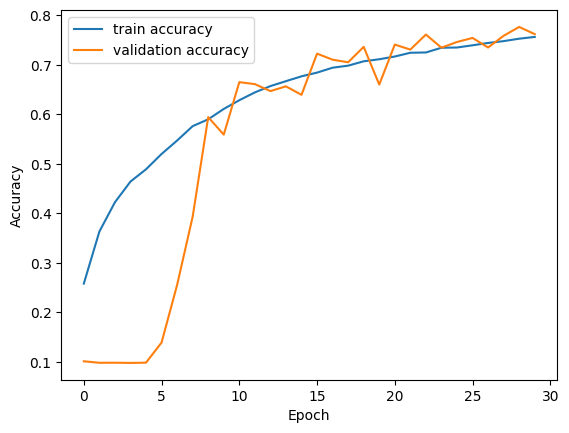

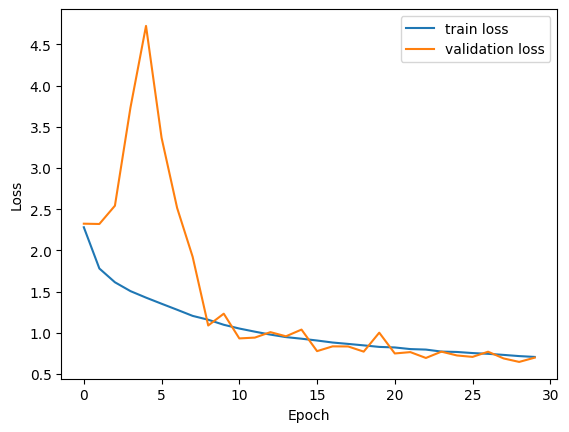

In [40]:
plt.plot(history_cifar7.history["accuracy"], label="train accuracy")
plt.plot(history_cifar7.history["val_accuracy"], label="validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history_cifar7.history["loss"], label="train loss")
plt.plot(history_cifar7.history["val_loss"], label="validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


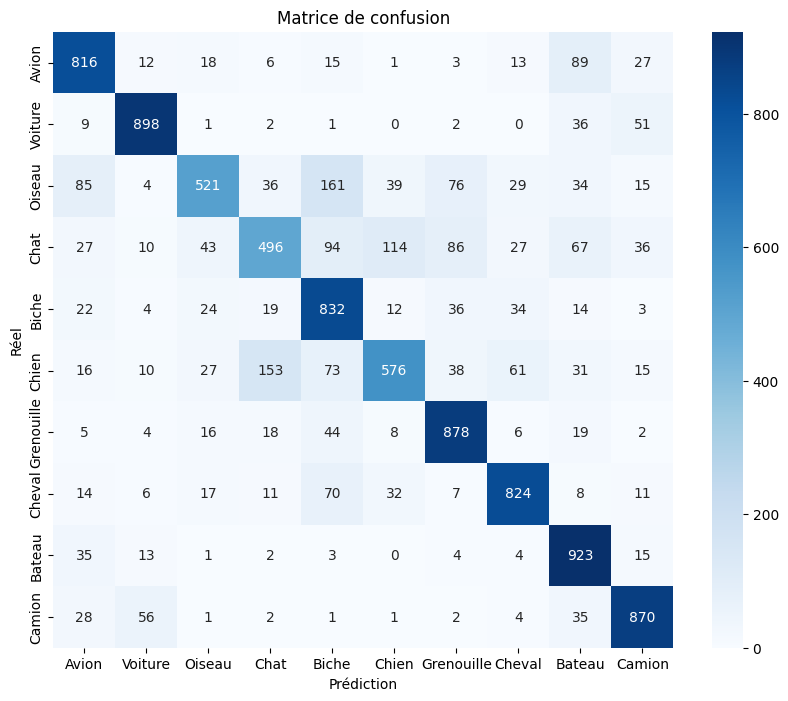

Deux classes les plus mal prédites:
Chat: 49.60% de précision
Oiseau: 52.10% de précision


In [41]:
y_pred7 = model_cifar7.predict(x_test_cifar_norm)
y_pred7_classes = np.argmax(y_pred7, axis=1)

cm7 = confusion_matrix(y_test_cifar, y_pred7_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm7, annot=True, fmt="d", cmap="Blues", 
            xticklabels=list(dictLabels_cifar.values()), 
            yticklabels=list(dictLabels_cifar.values()))
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.title("Matrice de confusion")
plt.show()

accuracy_per_class = cm7.diagonal() / cm7.sum(axis=1)
worst_classes = np.argsort(accuracy_per_class)[:2]
print("Deux classes les plus mal prédites:")
for idx in worst_classes:
    print(f"{dictLabels_cifar[idx]}: {accuracy_per_class[idx]*100:.2f}% de précision")

In [42]:
keras.backend.clear_session()

model_cifar8 = keras.Sequential(
    [
        layers.Input(shape=(32, 32, 3)),
        layers.Conv2D(16, (3, 3), activation="relu", padding="same"),
        layers.Conv2D(16, (3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
        layers.AveragePooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
        layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(128, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model_cifar8.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history_cifar8 = model_cifar8.fit(x_train_cifar_norm, y_train_cifar, epochs=20, batch_size=512, validation_split=0.2)

test_loss, test_acc = model_cifar8.evaluate(x_test_cifar_norm, y_test_cifar)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.2574 - loss: 2.3758 - val_accuracy: 0.1125 - val_loss: 2.2384
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.3646 - loss: 1.7835 - val_accuracy: 0.1078 - val_loss: 2.2588
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.4279 - loss: 1.5859 - val_accuracy: 0.1478 - val_loss: 2.2982
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.4702 - loss: 1.4540 - val_accuracy: 0.1554 - val_loss: 2.5444
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.5092 - loss: 1.3560 - val_accuracy: 0.2185 - val_loss: 2.3798
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.5374 - loss: 1.2791 - val_accuracy: 0.1956 - val_loss: 2.7320
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.5666 - loss: 1.2071 - val_accuracy: 0.2535 - val_loss: 2.6445
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.5882 - loss: 1.1510 - val_accuracy: 0.5219 - v

In [43]:
keras.backend.clear_session()

model_cifar9 = keras.Sequential(
    [
        layers.Input(shape=(32, 32, 3)),
        layers.Conv2D(16, (3, 3), padding="same"),
        layers.LeakyReLU(negative_slope=0.3),
        layers.Conv2D(16, (3, 3), padding="same"),
        layers.LeakyReLU(negative_slope=0.3),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(32, (3, 3), padding="same"),
        layers.LeakyReLU(negative_slope=0.3),
        layers.AveragePooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(64, (3, 3), padding="same"),
        layers.LeakyReLU(negative_slope=0.3),
        layers.Conv2D(64, (3, 3), padding="same"),
        layers.LeakyReLU(negative_slope=0.3),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(256),
        layers.LeakyReLU(negative_slope=0.3),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(128),
        layers.LeakyReLU(negative_slope=0.3),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model_cifar9.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history_cifar9 = model_cifar9.fit(x_train_cifar_norm, y_train_cifar, epochs=40, batch_size=128, validation_split=0.2)

test_loss, test_acc = model_cifar9.evaluate(x_test_cifar_norm, y_test_cifar)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - accuracy: 0.3266 - loss: 2.0254 - val_accuracy: 0.2162 - val_loss: 2.1722
Epoch 2/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.4557 - loss: 1.5061 - val_accuracy: 0.4099 - val_loss: 1.6584
Epoch 3/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.5250 - loss: 1.3165 - val_accuracy: 0.5814 - val_loss: 1.2161
Epoch 4/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step - accuracy: 0.5734 - loss: 1.1993 - val_accuracy: 0.6101 - val_loss: 1.0934
Epoch 5/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.5995 - loss: 1.1275 - val_accuracy: 0.5621 - val_loss: 1.3010
Epoch 6/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.6204 - loss: 1.0704 - val_accuracy: 0.6107 - val_loss: 1.1179
Epoch 7/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.6432 - loss: 1.0213 - val_accuracy: 0.6102 - val_loss: 1.1569
Epoch 8/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step - accuracy: 0.6491 - loss: 0.9877 - 

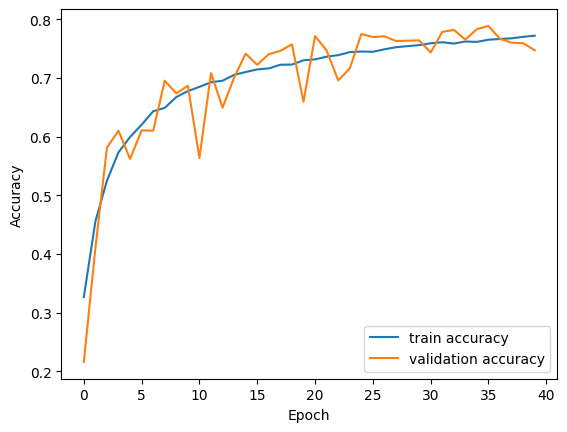

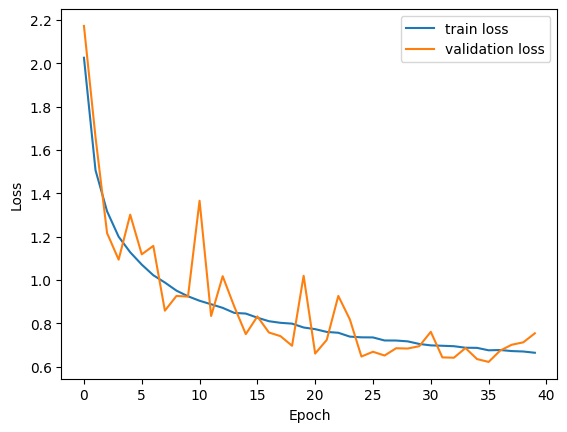

Train accuracy: 0.7755
Validation accuracy: 0.7472
Test accuracy: 0.7307


In [44]:
plt.plot(history_cifar9.history["accuracy"], label="train accuracy")
plt.plot(history_cifar9.history["val_accuracy"], label="validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history_cifar9.history["loss"], label="train loss")
plt.plot(history_cifar9.history["val_loss"], label="validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

train_loss, train_acc = model_cifar9.evaluate(x_train_cifar_norm, y_train_cifar, verbose=0)
val_idx = int(len(x_train_cifar_norm) * 0.8)
x_val = x_train_cifar_norm[val_idx:]
y_val = y_train_cifar[val_idx:]
val_loss, val_acc = model_cifar9.evaluate(x_val, y_val, verbose=0)

print(f"Train accuracy: {train_acc:.4f}")
print(f"Validation accuracy: {val_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")